<a href="https://colab.research.google.com/github/wmezadev/CSE-450-TEAM-4/blob/init-data/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA DICTIONARY FOR THE BANKING DATASET

We run campaigns periodically. In each campaign, we select a random set of customers, some of which we have already contacted in a previous campaign.

This dataset contains a random set of customers we'd like to target. Some of them have been contacted previously, others haven't been. You can tell how long its been since they were contacted by looking at the "pdays" field and the number of times we've contacted them before by looking at the "previous" field. The "poutcome" field will tell you whether or not the last contact resulted in a successful outcome.

We also have some information about the general economic conditions of the country at the time we last contacted each customer in the sample.


## bank client data:

age (numeric)

job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: has credit in default? (categorical: "no","yes","unknown")

housing: has housing loan? (categorical: "no","yes","unknown")

loan: has personal loan? (categorical: "no","yes","unknown")

## related with the last contact of the current campaign:

contact: contact communication type (categorical: "cellular","telephone")

month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

## other attributes:

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

## social and economic context attributes

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):

y - has the client subscribed a term deposit? (binary: "yes","no")

## Missing Attribute Values

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [ ]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
# Display the first 5 rows of the dataframe
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Display information about the dataframe, including the data type of each column and the number of non-null values
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [ ]:
# Display some basic statistics about the numeric columns of the dataframe
campaign.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.025493,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10.435288,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Visualizing the data

<Axes: xlabel='age', ylabel='Count'>

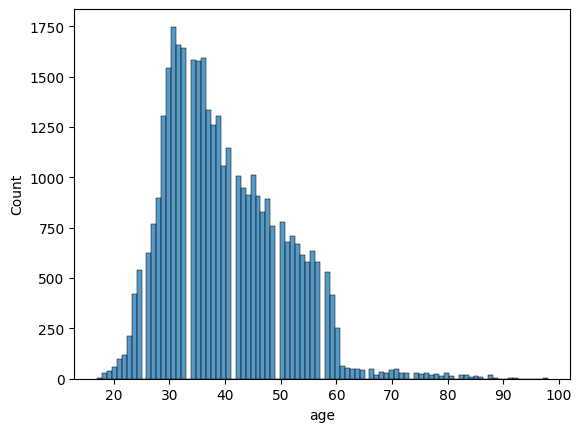

In [ ]:
import seaborn as sns
# Display a histogram of the 'age' column
sns.histplot(campaign['age'])

<Axes: xlabel='education', ylabel='count'>

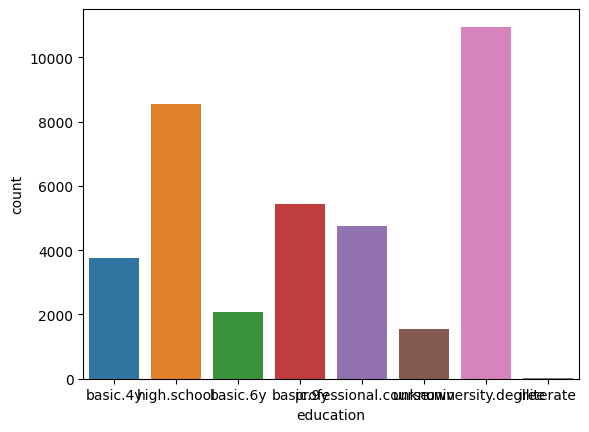

In [ ]:
# Display a bar chart of the 'education' column
sns.countplot(x='education', data=campaign)

# PROJECT QUESTIONS

## DATA SCIENCE METHODS

MIGUEL FERREIRA, BANK PRESIDENT ASKS:
The core task we're interested in is identifying those customers most likely to subscribe to a term deposit.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. In this case, our financial institution.

I don't know a lot about data science, but I've been trying to get up to speed. Do you think a supervised or unsupervised approach would work best for this situation?

## TRAIN TEST SPLIT

BEATRIZ, SENIOR DATA SCIENTIST ASKS:
Miguel, that is a great question.

While we are asking detailed questions, the dataset has approximately 37,000 records. How much of that data will you use to train your model?

Based on your initial analysis of the data, your team feels:

A simple 80/20 split will provide us with enough to accurately train and test our model.
A 50/50 split so that we have the same amount of training data as testing.
We will pull out 1,000 records for our test dataset and use the other 36,000 for training. This gives our model more to train on and will produce better results.
We will use all 37,000 for training and use cross-validation to evaluate the model.


## ADDITIONAL INSIGHTS

FRANCISCO, VP OF MARKETING ASKS:
Aside from the core marketing question Miguel mentioned, I'm wondering if there are other insights we could gain from our data.

I can look at the data and tell that some days of the week or some months produce better results than others.

I'm wondering if it's possible for us to see if those results are true for all customers, or if some types of customers respond better on certain days than others?

## DATA PRIVACY LAWS

BEATRIZ, SENIOR DATA SCIENTIST ASKS:
Since we're operating in the European Union, we're subject to GDPR compliance requirements.

What do you think we might need to do for this project in order to be compliant with GDPR regulations?

Based on your initial analysis of the data, your team feels:

This is historic data, so we should be just fine.
This is anonymous data, so we should be just fine.
The GDPR doesn't apply in this situation, since we're just building a model, not selling data.
In order to use this data under GDPR, we'll need to get consent from the customers in the dataset.

# PROJECT ISSUES

## CREATING MOST LIKELY TO SUSCRIBE MODEL (William)

MIGUEL FERREIRA, BANK PRESIDENT ASKS:
Like I said the other day, the core task we're interested in is identifying those customers most likely to subscribe to a term deposit.

This way, we can build a targeted marketing campaign that focuses primarily on those customers.

**Make sure to save it to a file (use the team repo)**

## DATA PATTERNS AND INSIGHTS (Sean)

FRANCISCO, VP OF MARKETING SAYS:
And I'd like you to find any actionable patterns in our results. Should we only call single people on Saturdays? Does it make sense to call students at all?

Things like that.

MIGUEL FERREIRA, BANK PRESIDENT ADDS:
One other thing we should probably address, does contacting people too frequently for these marketing campaigns have an adverse affect on the outcome?

## CREATING ADDITIONAL MODEL BASED ON CONSUMER CONFIDENCE (Luke)

BEATRIZ, SENIOR DATA SCIENTIST SAYS:
One last thing, there are a bunch of social and economic indicators in the data.

We should be careful about how we consider these. We may want to see separate models for times when, for example, the consumer confidence index is high compared to when it is low.

MIGUEL FERREIRA, BANK PRESIDENT ADDS:
Good thought Beatriz. Different customer segments tend to react to economic changes differently.

We'll definitely want to know if it's better to use a particular model during different economic situations.

**Make sure to save it to a file (use the team repo)**

## TESTING

FRANCISCO, VP OF MARKETING SAYS:
I have an additional request. We just received the results of our last marketing campaign and want to test your model against the list to see what impact it would have had against our bottom line. Could you run the list through your model and make some predictions for us?

You can access the data here: https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv

Then, please submit a csv file that has a single column, with the header "predictions" and a prediction (one per row) for each individual in this file. If we should contact the individual, predict a 1. If we shouldn't contact the individual, predict a 0 for that row. There should be 4,119 predictions in the csv file when completed.

Here is an example of what the csv should look like when finished (if your model had predicted to not contact anyone. Hopefully your csv has more 1s in it.): https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_csv_answers_sample.csv

## DELIVERIES

MIGUEL FERREIRA, BANK PRESIDENT ADDS:
Sounds like we have enough to get started. If you could send us your write up on this, that would be great.

- EXECUTIVE SUMMARY
- TEAM PRESENTATION VIDEO

# RESOURCES



[SOURCE](https://byui-cse.github.io/cse450-course/module-02/project.html
)

Tips from Johnny:

JOHNNY, THE DATA SCIENCE INTERN, WHISPERS TO YOU AFTER THE MEETING:
Hey, I put together a list of tips and ideas that might help us out:

## DATA DICTIONARY

Our database analyst put together this data dictionary to help explain the values and sources of different columns in the bank dataset, so be sure to review that.

## TARGET VARIABLE

One oddity here is that our target feature is simply labled y, but it's a boolean indicating "y" or "n", did the client subscribe to a term deposit.

## BINNING

Just as you did with the Titanic dataset when you reduced the number of titles, you may find it useful to "bin" categorical features into discrete groups in order to address some of the questions above. There are multiple ways to do this, but previously we used the map() function.

## DECISION TREES

You can find documentation on how to use decision trees with sci-kit learn on these pages:

[User Guide Entry for Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
[API Reference for DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[Tips for Practical Use, from the User Guide](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

## MODEL PERSISTENCE

When you train a model, a large amount of information is stored in memory. That model can then be used to make predictions for new instances at a later time.

You'll want to save these trained models using python's pickle module, as shown here.

However, rather than using pickle's default protocol version, you should use protocol version 5, which was introduced in Python 3.8 and is optimized for dealing with structures that contain numpy arrays and pandas data frames.

## MODEL ENSEMBLES, BAGGING, AND BOOSTING

Often, we can get better results by using a set of models, each using a slightly different set of training data, or other parameters. These are called "Model Ensembles" and it's very common to use an ensemble of decision trees (often called a "Random Forest") rather than a single tree.

Two popular techniques used in the creation of ensembles are "boosting" and "bagging". You can read more about these topics on pages 163 - 167 of your textbook.

For details on how to use these techniques with Sci-Kit Learn, see this page.

## AVOIDING OVERFITTING THROUGH PRUNING

It is very easy to overfit a decision tree. The text discusses strategies to avoid this problem in section 4.4.4 (pages 158 - 163).

In SciKit-Learn, you can use parameters such as max_depth and min_samples_leaf to control tree complexity and overfitting.

Alternatively, you can use something more elaborate, such as cost complexity pruning.


JOHNNY, THE DATA SCIENCE INTERN, DROPS BY YOUR HOTEL ROOM AROUND MIDNIGHT:
Okay, just one last thing, if you need any more help at all, I put together this collection of Google Colab notebooks that might be useful.